<h1><center>DS300: Exam 2</center></h1>

## Introduction: 

A great number of fruits are grown around the world, each of which has various types. The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. The external appearance of the fruits is a major determinant of the fruit type. Determining the variety of fruits by looking at their external appearance may necessitate expertise, which is time-consuming and requires great effort. 

The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using different machine learning methods. 

In accordance with this purpose, `898` images of `7` different date fruit types were obtained via the computer vision system. Through image processing techniques, a total of `34` features, including morphological features, shape, and color, were extracted from these images. 

![Date Fruits](https://github.com/BlueJayADAL/DS300/blob/master/datasets/datefruits.jpg?raw=true)

## Q1: Data Loading (10 Points)

In [32]:
# Use the given random seed
from numpy.random import seed
seed(101)

#### Import necessary libraries. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset from the given [URL](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/datefruits.csv). Name the DataFrame as `df`.

In [34]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/datefruits.csv'
df = pd.read_csv(url)


df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


#### Show the basic information.

In [35]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

## Q2: Data Preparation (10 Points)

#### Find the missing data. 

In [36]:
df.isna().sum()



AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

#### What are the unique classes for y label?

In [37]:
df['Class'].unique()



array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

#### What's the average `EXTENT` for different `Class` types?

In [38]:
df.groupby(['Class'])['EXTENT'].mean()



Class
BERHI     0.766549
DEGLET    0.760827
DOKOL     0.755143
IRAQI     0.763890
ROTANA    0.736674
SAFAVI    0.686883
SOGAY     0.731430
Name: EXTENT, dtype: float64

#### Given the following `Class` to numeric encoding mapping, transform the `Class` column to numeric. 

In [39]:
# Given this mapping dictionary
mapping_dict = {k:v for k, v in zip(df['Class'].unique(), np.arange(df['Class'].nunique()))}
mapping_dict

{'BERHI': 0,
 'DEGLET': 1,
 'DOKOL': 2,
 'IRAQI': 3,
 'ROTANA': 4,
 'SAFAVI': 5,
 'SOGAY': 6}

#### Now, transform the `Class` column using the given mapping. 
Hint: use lambda or define your own function. 

In [41]:
df.replace({"Class":mapping_dict}, inplace=True)

In [46]:
# Ensure the change was made. 
df['Class'].value_counts()

2    204
5    199
4    166
1     98
6     94
3     72
0     65
Name: Class, dtype: int64

## Q3: EDA (10 Points)

#### Display the count for each unique class. 

<AxesSubplot:xlabel='Class', ylabel='count'>

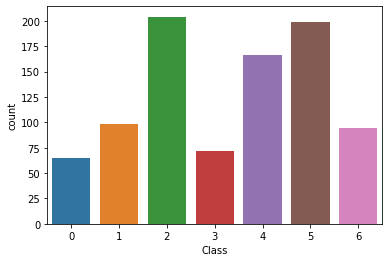

In [47]:
sns.countplot(x=df['Class'])



#### Study the x and y-axis in each subplot, then regenerate the following figure.

In [48]:
# Show the exsiting column names
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

Text(0, 0.5, 'Average of EXTENT')

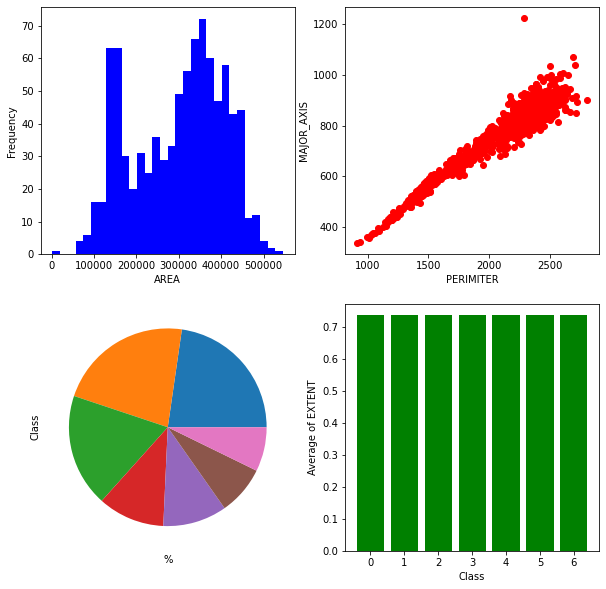

In [174]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (10, 10))

# The histogram on the upper left conner
axes[0][0].hist(df['AREA'], bins = 30, color = 'b')
axes[0][0].set_xlabel('AREA')
axes[0][0].set_ylabel('Frequency')

# Show the rest of the subplots
axes[0][1].scatter(x=df['PERIMETER'], y=df['MAJOR_AXIS'], color = 'r')
axes[0][1].set_xlabel('PERIMITER')
axes[0][1].set_ylabel('MAJOR_AXIS')

axes[1][0].pie(df['Class'].value_counts())
axes[1][0].set_xlabel('%')
axes[1][0].set_ylabel('Class')

axes[1][1].bar(x=df['Class'], height=df['EXTENT'].mean(), color = 'g')
axes[1][1].set_xlabel('Class')
axes[1][1].set_ylabel('Average of EXTENT')



## Q4: Data Splitting and Scaling (10 Points)

#### Prepare the X feature matrix and y label vector.

In [50]:
X = df.drop('Class', axis=1)

y = df['Class']


#### Split the data using 80:20 split. Use random seed as 101.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=101)


#### Standardize the X_train and X_test so that they have zero mean and unit standard deviation. 

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [61]:
# Display the standardized X for comparison
print('X_train:\n', X_train[:2])
print('X_test:\n', X_test[:2])

X_train:
 [[ 0.3895891   0.50460647  0.7653039   0.06886121  0.82943081  0.44538095
   0.06074394  0.38781093 -1.1500177  -0.02866231 -0.33446916 -0.67954613
  -0.04756124 -0.68208395 -0.75581611  0.3958629  -1.54021312 -1.39937391
  -1.29663807 -1.56170204 -0.96931536 -1.68845372  1.43816503  1.72821536
   0.88288696  1.10905047  1.75404855  0.77295717  1.16673098  1.06005942
   0.89024064 -1.54032904 -1.39944107 -1.29682301]
 [-2.05579934 -2.46702624 -2.60598342 -1.98941811 -0.43840695 -2.40459485
   0.35626917 -2.07000508  0.28707972 -0.04432337  0.54932935  0.58433366
   0.04868234  3.83929083  0.60293188  0.34931139  0.25996829  0.28790824
   0.21116302  0.35081135 -0.00527089  0.71155605 -0.4969096  -0.78534001
  -0.64159598 -0.71593359 -0.72391782 -0.84546114  1.08905042  1.17265066
   1.29948791  0.25991959  0.28791227  0.21120905]]
X_test:
 [[ 1.15137268e+00  8.80163109e-01  5.03123412e-01  1.37101296e+00
  -1.42475320e+00  1.06878240e+00  5.49703865e-01  1.11570861e+00
  -8.9

## Q5: Balancing the Data (10 Points)

#### As found from Q3, the labels in the dataset are not balanced. We need to resample the training set (`X_train` and `y_train`) but keep the testing set unchanged. 

In [63]:
# Use Sklearn's resampe() function
from sklearn.utils import resample

#### Recreate a DataFrame just for the training set by combining `X_train` and `y_train`.

In [64]:
# Run the following code
df_train = pd.DataFrame(data = X_train, columns = df.columns[:-1])
df_train['Class'] = y_train.values
df_train.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,0.389589,0.504606,0.765304,0.068861,0.829431,0.445381,0.060744,0.387811,-1.150018,-0.028662,...,1.109050,1.754049,0.772957,1.166731,1.060059,0.890241,-1.540329,-1.399441,-1.296823,5
1,-2.055799,-2.467026,-2.605983,-1.989418,-0.438407,-2.404595,0.356269,-2.070005,0.287080,-0.044323,...,-0.715934,-0.723918,-0.845461,1.089050,1.172651,1.299488,0.259920,0.287912,0.211209,2
2,-0.281998,-0.112017,0.136681,-0.449341,0.893611,-0.169495,0.114476,-0.288565,1.296983,-0.027482,...,-0.441316,-0.677531,-0.588135,-0.649276,-0.681421,-0.263926,0.819937,0.814932,0.497335,1
3,-1.417057,-1.476288,-1.418945,-1.324216,0.434217,-1.437849,0.544331,-1.437508,-0.704087,-0.034904,...,-0.390746,-0.725903,-0.903189,0.063396,-0.151798,0.428956,1.221501,1.625871,1.026743,2
4,0.708620,0.842494,1.299250,0.106151,1.162717,0.714634,0.189700,0.699419,0.584992,-0.021798,...,0.575464,1.680082,0.596062,1.057083,0.975048,0.819711,-1.442371,-1.369341,-1.352022,5


#### Using the given for loop to generate a new sampled DataFrame named `df_train_resampled`. 
Hint: to debug your program and isolate errors, work on a single line of code at a time, and use print() to display the result right away. 

In [71]:
# An empty DataFrame to be grown
df_train_resampled = pd.DataFrame()

# Use a for loop to resample for each Class
for class_i in df_train['Class'].unique():   
    # Use boolean selection to select the subset that 
    # has the given class number class_i
    df_i = df_train[df_train['Class']==class_i]
    
    
    # Resample this subset DataFrame to have 
    # exactly 100 records. Set replace argument to True.
    # Use randome seed as 101. 
    df_i_resampled = resample(df_i, n_samples=100, random_state=101)
    
    
    # Concatenate df_i_resampled with df_train_resampled to 
    # grow X_train_resampled
    df_train_resampled = pd.concat([df_train_resampled, df_i_resampled])
    
    

In [72]:
# Ensure the new DataFrame has balanced classes.
df_train_resampled['Class'].value_counts()

5    100
2    100
1    100
6    100
4    100
0    100
3    100
Name: Class, dtype: int64

#### Split the `df_train_resampled` DataFrame into the feature matrix and label vector. 

In [74]:
X_train_resampled = df_train_resampled.drop('Class', axis=1)

y_train_resampled = df_train_resampled['Class']


In [75]:
X_train_resampled.shape

(700, 34)

In [76]:
y_train_resampled.shape

(700,)

<span style="color:red">Important Note: for the rest of the notebook, use `X_train_resampled` and `y_train_resampled` as the training set. Otherwise, the models may not yield the desired results. </span>

## Q6: Baseline Modeling (10 Points)

#### Use a Gaussian Naive Bayes model as a baseline design. Use the default arguments for the model. 

In [77]:
# Import the model class
from sklearn.naive_bayes import GaussianNB

In [78]:
# Create a model estimator object
nb = GaussianNB()


# Train the model
nb.fit(X_train_resampled,y_train_resampled)


# Make a prediction
y_pred = nb.predict(X_test)


C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [80]:
# Import the necessary metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report


In [81]:
# Generate confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0  3  1  0  0]
 [ 0 17  4  0  0  0  3]
 [ 0  1 40  0  0  0  0]
 [ 0  0  0 14  0  0  0]
 [ 0  0  0  0 26  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  6  0  0  0  0 18]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.71      0.71      0.71        24
           2       0.91      0.98      0.94        41
           3       0.82      1.00      0.90        14
           4       0.96      1.00      0.98        26
           5       1.00      1.00      1.00        37
           6       0.86      0.75      0.80        24

    accuracy                           0.90       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.90      0.90      0.90       180



## Q7: Dimensionality Reduction (10 Points)

#### Let's generate a Scree Plot to see how much does each principal component contribute to the variance. 

In [82]:
# Import PCA class
from sklearn.decomposition import PCA

#### Create the first PCA transformer object that uses `n_component` as the same number of the training features. Train the PCA object, and use the trained object to transform `X_train_resampled`.

In [83]:
pca = PCA(n_components=34)
pca.fit(X_train_resampled)
X_train_pca = pca.transform(X_train_resampled)


In [84]:
# Print the size of the PCA transformed X train.  
print('X training set shape using the PCs as basis:', X_train_pca.shape)

X training set shape using the PCs as basis: (700, 34)


#### Generate a DataFrame for the Scree Plot using the code below. 

In [87]:
# Supply for the data arugment below 

df_scree = pd.DataFrame(data =pca.explained_variance_ratio_, 
                        columns = ['Explained Variance Ratio'],
                        index = ['PC{}'.format(i) for i in range(1, 35)])
df_scree

,Explained Variance Ratio
PC1,3.625340e-01
PC2,2.424764e-01
PC3,1.239189e-01
PC4,7.249711e-02
PC5,5.700017e-02
PC6,3.909845e-02
PC7,2.890564e-02
PC8,1.894293e-02
PC9,1.622758e-02
PC10,8.273369e-03


#### Generate a Scree Plot for all the PCs using a bar plot. 

Text(0.5, 1.0, 'Scree Plot')

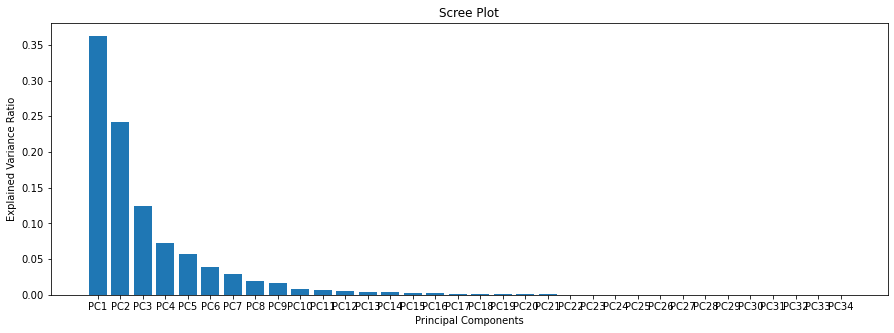

In [91]:
plt.figure(figsize = (15, 5))

# Generate the bar plot
plt.bar(df_scree.index, df_scree['Explained Variance Ratio'])


plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

## Q8: Dataset Visualization using PCA (10 Points)

#### This time, train a new PCA transformer `pca2` that uses only two principal components. 

In [92]:
pca2 = PCA(n_components=2)
pca2.fit(X_train_resampled)
X_train_pca = pca2.transform(X_train_resampled)


In [93]:
print('X training set shape using the PCs as basis:', X_train_pca.shape)

X training set shape using the PCs as basis: (700, 2)


#### Use the first two principal components to generate a new DataFrame `df_train_pca` shown as below. 
Hint: similar to the second cell from Q5. 

In [106]:
X_train_pca.shape

(700, 2)

In [114]:
# Create df_train_pca with PC1 and PC2
df_train_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])


# Add in the Class column
df_train_pca['Class'] = y_train_resampled.to_list()


df_train_pca

,PC1,PC2,Class
0,-3.315872,3.654079,5
1,-3.401482,3.423818,5
2,-4.438347,3.703402,5
3,-3.500522,2.997379,5
4,-3.316585,3.636298,5
...,...,...,...
695,-5.540722,-0.345242,3
696,-7.080566,-0.671291,3
697,-5.992646,-3.103835,3
698,-3.823135,-2.270163,3


#### Plot the new dataset `df_train_pca` on the new basis. Use column `Class` to color-code. 

Text(0.5, 1.0, 'PCA of IRIS dataset')

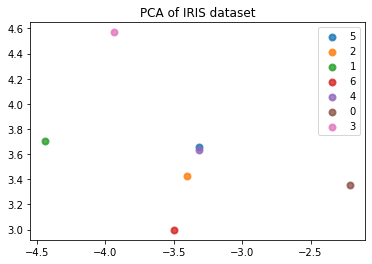

In [134]:
plt.figure()
t = y_train_resampled.to_list()
target_names = df_train_pca['Class'].unique().tolist()
for i, target_name in zip([0, 1, 2, 3, 4, 5, 6], target_names):
    plt.scatter(
        X_train_pca[i, 0], X_train_pca[i, 1], cmap='Qualitative' ,alpha=0.8, lw=2, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

## Q9: Neural Networks (20 Points)

#### In this question, the goal is to use a Multilayer Perceptron (MLP) model to refine the model accuracy. To receive full credits, the model testing F1 score in the classification report has to be no less than the baseline Naive Bayes model. A line chart to show the training and validation accuracy over 50 epochs has to be displayed. 

#### The suggested MLP settings are:
+ Use at least 3 dense hidden layers, each layer with exactly 80 neurons. 
+ Carefully design the input and output layers to match with the given problem. 
+ In model optimization, use the Adam optimizer. Carefully choose the loss function. 

#### Some additional consideration needed:
+ Convert `y_train_resampled` and `y_test` to one-hot encoding scheme, since y has to be one-hot encoded in multi-class classification for tensorflow.
+ Use the testing set as the validation set during model training. 
+ Add new cells as needed.

In [135]:
# Importing the tensorflow libraries and packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configure tensorflow to avoid potential warnings
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

# Define the random seeds
from tensorflow.random import set_seed
set_seed(101)

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [198]:
onehot = OneHotEncoder(drop='first')
df_onehot = onehot.fit_transform(df_train_resampled[['Class']])
df_onehot = pd.DataFrame(data=df_onehot.toarray(), columns=onehot.get_feature_names_out())

In [201]:
onehot_test = OneHotEncoder(drop='first')
df_onehot_test = onehot_test.fit_transform(y_test.values.reshape(-1,1))
df_onehot_test = pd.DataFrame(data=df_onehot_test.toarray(), columns=onehot_test.get_feature_names_out())

In [230]:
model = keras.Sequential(name='exam2-MLP')
model.add(layers.Dense(units = 80, activation='relu', input_dim=34))
model.add(layers.Dense(units=80, activation='relu'))
model.add(layers.Dense(units=80, activation='relu'))


model.add(layers.Dense(units=6, activation='sigmoid'))



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train_resampled, df_onehot,
                    batch_size=32,
                    epochs = 50,
                    validation_data = (X_test, df_onehot_test))



Epoch 1/50
22/22 [==============================] - 0s 18ms/step - loss: 0.5456 - accuracy: 0.3471 - val_loss: 0.3567 - val_accuracy: 0.4500
Epoch 2/50
22/22 [==============================] - 0s 15ms/step - loss: 0.2761 - accuracy: 0.5443 - val_loss: 0.1963 - val_accuracy: 0.6889
Epoch 3/50
22/22 [==============================] - 0s 16ms/step - loss: 0.1719 - accuracy: 0.6500 - val_loss: 0.1406 - val_accuracy: 0.8056
Epoch 4/50
22/22 [==============================] - 0s 17ms/step - loss: 0.1251 - accuracy: 0.7514 - val_loss: 0.1166 - val_accuracy: 0.8167
Epoch 5/50
22/22 [==============================] - 0s 17ms/step - loss: 0.1005 - accuracy: 0.7686 - val_loss: 0.0977 - val_accuracy: 0.8333
Epoch 6/50
22/22 [==============================] - 0s 16ms/step - loss: 0.0850 - accuracy: 0.7786 - val_loss: 0.0877 - val_accuracy: 0.8556
Epoch 7/50
22/22 [==============================] - 0s 16ms/step - loss: 0.0747 - accuracy: 0.7843 - val_loss: 0.0812 - val_accuracy: 0.8611
Epoch 8/50
22

In [232]:
pred = model.evaluate(X_test, df_onehot_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.1105 - accuracy: 0.8389


In [234]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

ValueError: Found input variables with inconsistent numbers of samples: [180, 2]

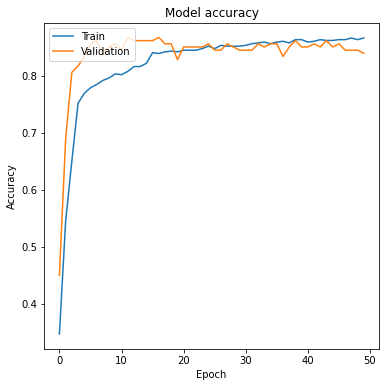

In [231]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')

# Plot the lines
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Great Job!